# Importing The Neccesary Libraries

In [86]:
import pandas as pd
import ta
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Extracting The Data 

The stock data of TATA Motors was obtained using the yfinance module, covering the time period from 1999 to 2023. The data was then extracted and stored for further analysis.

In [87]:
start_date = '2020-01-01'
end_date = '2023-05-12'
ticker = 'TATAMOTORS.NS'

df = yf.download(ticker, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,185.1499938964844,186.6999969482422,183.6000061035156,184.4499969482422,184.4499969482422,25968357
2020-01-02,185.0000000000000,194.6999969482422,184.6000061035156,193.7500000000000,193.7500000000000,57289863
2020-01-03,192.8999938964844,195.6499938964844,189.2500000000000,191.1000061035156,191.1000061035156,47572728
2020-01-06,191.0000000000000,191.0000000000000,185.0500030517578,185.6499938964844,185.6499938964844,28621212
2020-01-07,187.0000000000000,189.3999938964844,182.3000030517578,184.6999969482422,184.6999969482422,34995035


# Data Exploration

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 834 entries, 2020-01-01 to 2023-05-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       834 non-null    float64
 1   High       834 non-null    float64
 2   Low        834 non-null    float64
 3   Close      834 non-null    float64
 4   Adj Close  834 non-null    float64
 5   Volume     834 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.6 KB


In [89]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,834.0000000000000,834.0000000000000,834.0000000000000,834.0000000000000,834.0000000000000,834.0000000000000
mean,318.8939446739727,323.6764991449223,313.6140888955096,318.4164870008290,318.4164870008290,43037660.3669064715505
std,140.0821679715592,141.3676716361366,138.4022699804369,139.8435924352916,139.8435924352916,41251344.7632956132293
min,66.5000000000000,66.9000015258789,63.5000000000000,65.3000030517578,65.3000030517578,2871205.0000000000000
25%,176.6874961853027,181.4624977111816,173.5999984741211,176.8500061035156,176.8500061035156,15203655.0000000000000
50%,338.0500030517578,343.7749938964844,333.8249969482422,336.7249908447266,336.7249908447266,29872618.5000000000000
75%,436.0750045776367,441.1124954223633,430.5750045776367,435.4375076293945,435.4375076293945,56827192.0000000000000
max,531.4500122070312,536.7000122070312,520.2500000000000,530.1500244140625,530.1500244140625,390577839.0000000000000


# Exploratory Data Analysis

- Mean: The average value of the opening or closing prices. A high mean value suggests that the stock is generally expensive, while a low mean value suggests that it is generally inexpensive.
- Median: The middle value of the opening or closing prices. It represents the typical value of the stock prices and is less sensitive to outliers than the mean.
- Standard Deviation: The measure of the spread of the opening or closing prices. A high standard deviation suggests that the stock prices are widely spread out, while a low standard deviation suggests that they are tightly clustered around the mean.
- Maximum and Minimum values: The highest and lowest values of the opening or closing prices, respectively. These values provide information about the range of the stock prices and whether there have been any drastic changes in the stock price over time.

In [90]:
# Average,Median, STd , max  and min of Closing Price
print("Mean of closing price: ", df['Close'].mean())
print("Median of closing price: ", df['Close'].median())
print("Standard deviation of closing price: ", df['Close'].std())
print("Maximum value Of closing price: ",df['Close'].max())
print("Mininum value Of closing price: ",df['Close'].min())

Mean of closing price:  318.416487000829
Median of closing price:  336.72499084472656
Standard deviation of closing price:  139.84359243529158
Maximum value Of closing price:  530.1500244140625
Mininum value Of closing price:  65.30000305175781


In [91]:
# Average,Median, STd , max  and min of Open Price 
print("Mean of Opening price: ", df['Open'].mean())
print("Median of Opening price: ", df['Open'].median())
print("Standard deviation of Opening price: ", df['Open'].std())
print("Maximum value Of Opening price: ",df['Open'].max())
print("Mininum value Of Opening price: ",df['Open'].min())

Mean of Opening price:  318.8939446739727
Median of Opening price:  338.0500030517578
Standard deviation of Opening price:  140.08216797155916
Maximum value Of Opening price:  531.4500122070312
Mininum value Of Opening price:  66.5


It seems that the stock has generally expensive opening and closing prices with a wide spread of values. The mean and median of the opening and closing prices are close to each other, suggesting that the stock prices are normally distributed. The standard deviation values are also relatively high, indicating that the stock prices are widely spread out. The high maximum and low minimum values suggest that the stock prices have gone through some significant changes over time. However, to get a clearer picture of the stock, more data and analysis would be needed.

In [92]:
# Percent Return Of Closing Price
returns = df['Close'].pct_change()
returns.head()

Date
2020-01-01                NaN
2020-01-02    0.0504201854466
2020-01-03   -0.0136773878528
2020-01-06   -0.0285191629145
2020-01-07   -0.0051171396686
Name: Close, dtype: float64

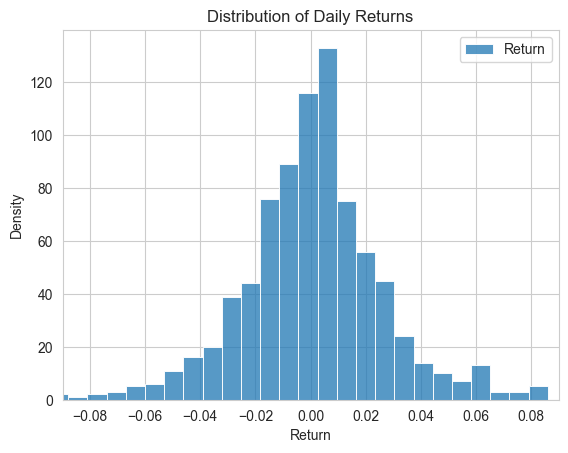

In [93]:
sns.histplot(returns[1:], bins=50,label='Return')
plt.xlabel('Return')
plt.ylabel('Density')
plt.title('Distribution of Daily Returns')
plt.legend()
plt.gca().set_xlim(-0.09, 0.09)
plt.show()

Most of the distribution of daily returns of TATA Motors stock is between -0.02 and 0.02 indicates that the stock's daily returns are relatively stable and do not experience large fluctuations. A high concentration of returns in a narrow range suggests that the stock's price changes relatively little from day to day.

In [94]:
# Date With Lowest and Highest Returns
print(returns.idxmin())
print(returns.idxmax())

2020-03-23 00:00:00
2021-10-13 00:00:00


Lowest Return By TATA Motors

- Tata Motors share price crashed 22.41% to a 52-week low of 141.90, due to a Rs 27,838 crore non-cash charge to cover impairment at JLR, and a cut in future profit margin outlook.

Highest Return By TATA Motors

- Tata Motors' stock rose 50.82% in five days to close at Rs 506.75 on 13 Oct 2021 due to a 1 billion Dollar investment from TPG Rise   Climate to raise the valuation of the company's passenger electric vehicle business to up to 9.1 billion Dollar.

In [95]:
# Chart Variation Between the Highest Returns and Lowest Returns
Chart = df[["Open","High","Low","Close"]].loc['2019-01-01':'2022-01-01']
Chart.iplot(kind='candle')

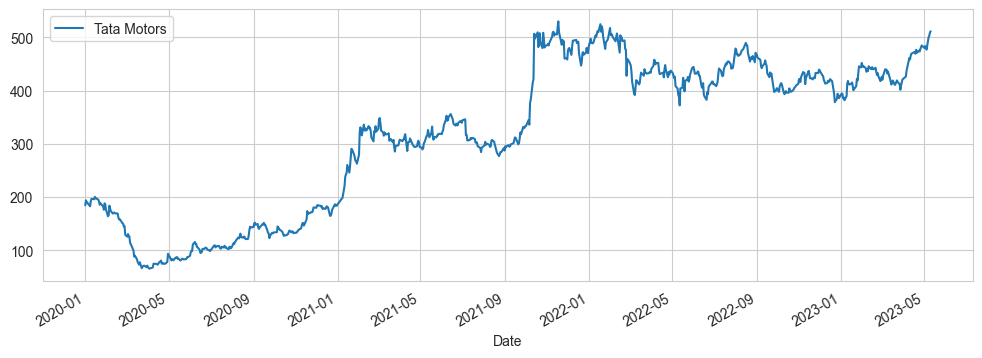

In [96]:
Closed_price = df['Close']
Closed_price.plot(label="Tata Motors",figsize=(12,4))
plt.legend()

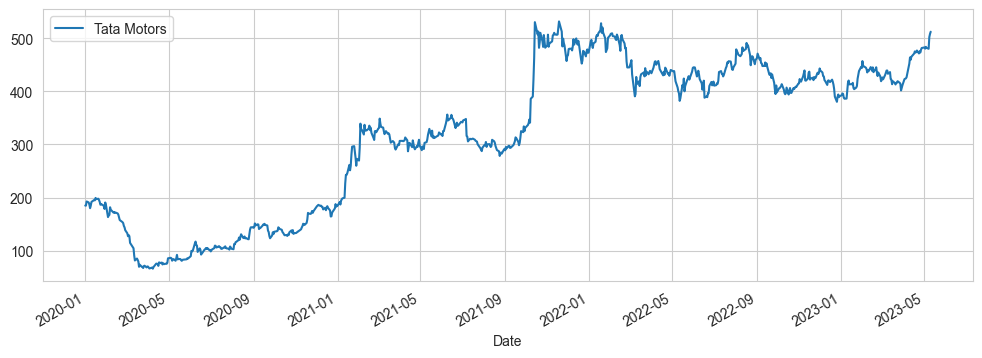

In [97]:
Open_price = df['Open']
Open_price.plot(label="Tata Motors",figsize=(12,4))
plt.legend()

This Is Interactive Version Of Above Plot Using Plotly Iplot() Method.

In [98]:
df[['Open','Close']].iplot()

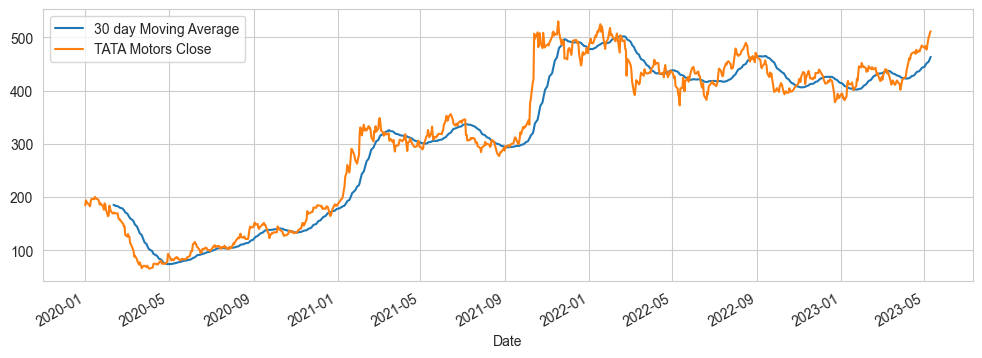

In [99]:
plt.figure(figsize=(12,4))
df['Close'].rolling(window=30).mean().plot(label='30 day Moving Average')
df['Close'].plot(label='TATA Motors Close')
plt.legend()

In [100]:
Moving_Avg = df['Open'].rolling(window=30).mean()
New_df = pd.merge(Moving_Avg,Open_price,on = 'Date')
New_df.rename(columns = {'Open_x':'Moving 30 Day Avg'}, inplace = True)
New_df.rename(columns = {'Open_y':'Open Price'}, inplace = True)
New_df.iplot()

30-day moving average and the closing price trendline are moving in the same direction on a long-term trend for TATA Motors stock, it means that the stock's average price over the past 30 days and the closing price trend are aligned, indicating a strong trend in the stock's price movement.

<AxesSubplot: >

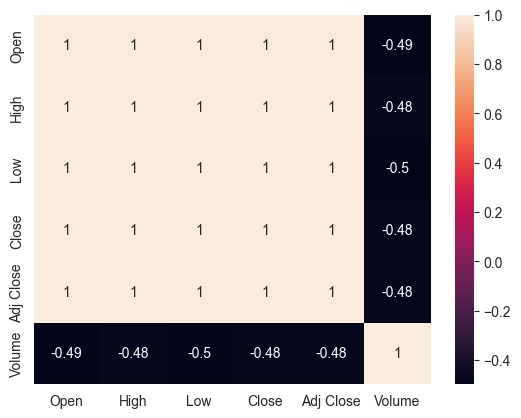

In [101]:
sns.heatmap(df.corr(),annot=True)

In [102]:
df['Close'].loc['2022-01-01':'2023-01-30'].ta_plot(study='sma',periods=[7,21,55])

The plot will show the stock price with the three moving averages superimposed. Traders and investors can use the plot to help identify trends and make investment decisions. The moving averages can also be used to determine the strength of a trend and provide potential buy or sell signals based on the relationship between the stock price and the moving averages.

In [103]:
df[['Open']].loc['2022-01-30':'2023-01-30'].ta_plot(study='boll')

In [104]:
df[['Close']].loc['2022-01-30':'2023-01-30'].ta_plot(study='boll')

The plot will show the stock price with the Bollinger Bands superimposed. Traders and investors can use the plot to help identify trends and make investment decisions. The Bollinger Bands can also be used to determine the volatility of a stock and provide potential buy or sell signals based on the stock price relative to the upper and lower bands. When the stock price is near the upper band, it may be overbought, and when it is near the lower band, it may be oversold.

# Feature Engineering

In [105]:
# Weekly Moving Average
df['ma_7'] = df['Close'].rolling(window=7).mean()

Moving averages are used in technical analysis to smooth out fluctuations in the stock price and identify trends over a longer time period. By calculating different moving averages with different time periods, traders and investors can identify different trends and determine the strength of those trends. For example, a 7-day moving average will give a quicker response to price changes compared to a 90-day moving average.

In [106]:
# Bollinger Bands for a Close price

df['ma_20'] = df['Close'].rolling(window=20).mean()

df['std_20'] = df['Close'].rolling(window=20).std()

df['upper_band'] = df['ma_20'] + 2 * df['std_20']

df['lower_band'] = df['ma_20'] - 2 * df['std_20']

Bollinger Bands are a technical analysis tool used to identify when a stock price is overbought or oversold.The Bollinger Band formula is used to calculate an upper and lower band around a moving average of a stock price. 
The formula is as follows:

Upper Band = Moving Average (MA) + 2 * Standard Deviation (STD)
Lower Band = Moving Average (MA) - 2 * Standard Deviation (STD)

MA = Moving average of the stock price over a specified time period (usually 20 days)
STD = Standard deviation of the stock price over the same specified time period

The upper band represents overbought conditions, while the lower band represents oversold conditions. When the stock price moves outside the bands, it can signal a potential trend reversal.

In [107]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ma_7', 'ma_20',
       'std_20', 'upper_band', 'lower_band'],
      dtype='object')

In [108]:
df = df.drop(['High', 'Low','Adj Close'],axis=1)

In [109]:
df.isnull().sum()

Open           0
Close          0
Volume         0
ma_7           6
ma_20         19
std_20        19
upper_band    19
lower_band    19
dtype: int64

In [28]:
import math
def fill_na_mean_closest_two(col):
    """
    Fills missing values in the column by taking the mean of the two closest non-null values.
    """
    not_null = col.notnull()
    idx = col.index[not_null]
    val = col.loc[not_null].values
    
    filled = col.copy()
    for i, row in col[~not_null].iteritems():
        j = np.searchsorted(idx, i, side='left')
        if j > 0 and (j == len(idx) or math.fabs(i - idx[j-1]) < math.fabs(i - idx[j])):
            j -= 1
        filled.loc[i] = (val[j-1] + val[j]) / 2
    return filled

In [29]:
df = df.apply(fill_na_mean_closest_two)

In [116]:
df.dropna(inplace=True)
df.head()

,Open,Close,Volume,ma_7,ma_20,std_20,upper_band,lower_band
Date,,,,,,,,
2020-01-28,183.8999938964844,176.1000061035156,38283588,186.4571424211775,190.1525009155274,6.4820710192031,203.1166429539335,177.1883588771212
2020-01-29,178.8000030517578,188.0500030517578,61585660,185.4642857142857,190.3325012207031,6.3642984185005,203.0610980577042,177.6039043837021
2020-01-30,190.9499969482422,186.1999969482422,70900581,184.7214290073940,189.9550010681152,6.3748261449407,202.7046533579966,177.2053487782338
2020-01-31,186.3000030517578,176.6000061035156,75621897,183.4357147216797,189.2300010681152,7.0287459132950,203.2874928947052,175.1725092415252
2020-02-03,163.5000000000000,163.8500061035156,66616190,179.9285736083984,188.1400016784668,9.0211092585086,206.1822201954841,170.0977831614495


<AxesSubplot: >

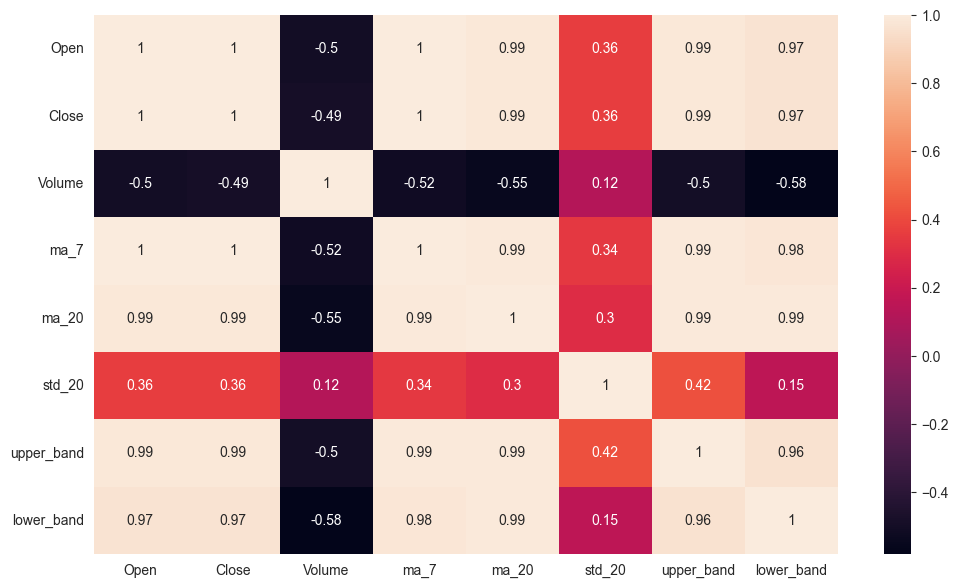

In [117]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

The close price of the stock shows a strong correlation with its 7-day moving average, as well as with the upper and lower bands of Bollinger Bands. The change in percentage between the open and close prices is highly associated with the stock's momentum and log returns.

# Model Training

In [118]:
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

X_train = train_data.drop('Close',axis=1)
y_train = train_data['Close']
X_test = test_data.drop('Close',axis=1)
y_test = test_data['Close']

In [119]:
std = MinMaxScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [120]:
model_lr = LinearRegression(n_jobs=-1)
model_lr.fit(X_train, y_train)

model_rf = RandomForestRegressor(n_jobs=-1)
model_rf.fit(X_train, y_train)

model_svr = SVR()
model_svr.fit(X_train, y_train)

SVR()

In [121]:
y_predict_lr = model_lr.predict(X_test)
y_predict_rf = model_rf.predict(X_test)
y_predict_svr = model_svr.predict(X_test)

In [122]:
print("R2 score for linear regression: ", r2_score(y_test, y_predict_lr))
print("R2 score for random forest: ", r2_score(y_test, y_predict_rf))
print("R2 score for SVR: ", r2_score(y_test, y_predict_svr))

R2 score for linear regression:  0.9516679456767138
R2 score for random forest:  0.9298548382265217
R2 score for SVR:  0.34399857626537955


### Based on the model accuracy of 0.9990185478383216, it can be concluded that the Linear Regression model is the best suitable model for this data.

In [123]:
y_test_predict = y_predict_lr
score = r2_score(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print("R2_Score:",score)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)

R2_Score: 0.9516679456767138
MSE: 34.84030873868482
MAE: 4.683512265836187
RMSE: 5.902567978319675


In [124]:
pd.options.display.float_format = '{:.13f}'.format
test_check = pd.DataFrame()
test_check['actual'] = y_test
test_check['prediction'] = y_test_predict
test_check['difference'] = y_test - y_test_predict
test_check.sort_index()

,actual,prediction,difference
Date,,,
2022-09-13,456.7999877929688,452.1546319174994,4.6453558754694
2022-09-14,450.2000122070312,446.3350364782310,3.8649757288003
2022-09-15,447.2500000000000,450.3353407703287,-3.0853407703287
2022-09-16,432.5000000000000,445.0936694986358,-12.5936694986358
2022-09-19,425.4500122070312,431.9446207266831,-6.4946085196518
...,...,...,...
2023-05-05,477.1000061035156,480.5840899586527,-3.4840838551370
2023-05-08,500.5000000000000,480.5946178166312,19.9053821833688
2023-05-09,503.6499938964844,499.8543970101618,3.7955968863225


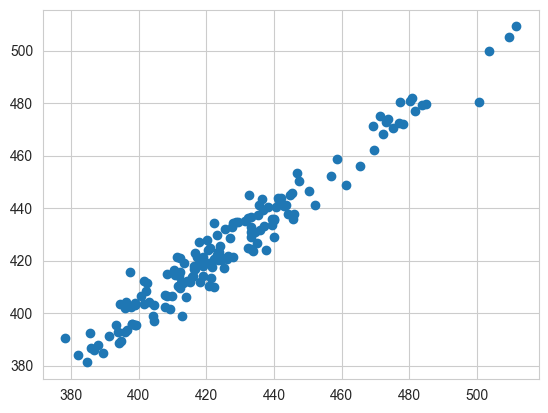

In [125]:
plt.scatter(y_test,y_test_predict)

In [126]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_test_predict)

In [127]:
mape

1.0991384336646508

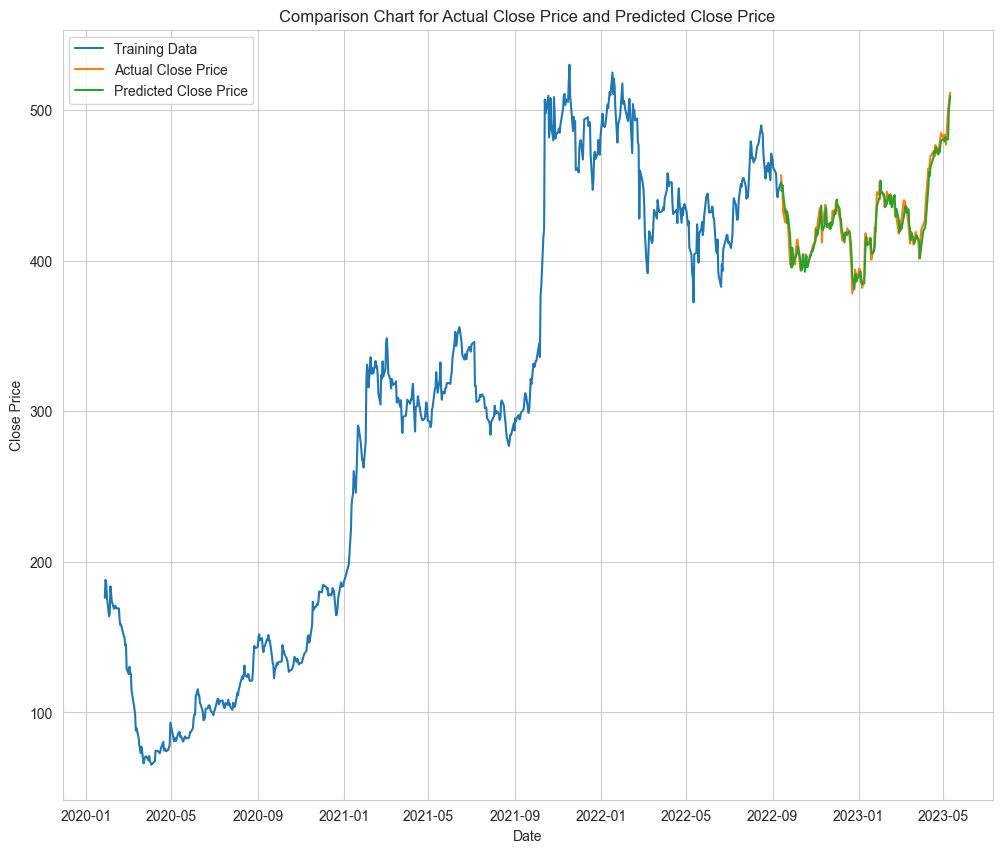

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.plot(y_train, label='Training Data')
plt.plot(test_check['actual'], label='Actual Close Price')
plt.plot(test_check['prediction'], label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Comparison Chart for Actual Close Price and Predicted Close Price')
plt.legend()
plt.show()